# Physics 77/88 - Fall 2024 - Homework 4 
## Parsing Data and Full Workflow
*Submit this notebook to bCourses to receive a credit for this assignment.*
<br>
due: **Oct 16 2024** 
<br>
**Please upload both, the .ipynb file and the corresponding .pdf**
<br>
## Problem 1 (20P)

The data set *Data.txt* contains a frequency spectrum which has been obtained from a frequency grid search. The first column referes to the frequency $F$ in Hz and the second column contains the corresponding log probabilities $P$ for each frequency interval.<br>
The second data set *ToA.txt* contains the **t**ime **o**f **a**rrival in seconds of the descrete signal.<br>
<br>
Write a function **PlotData.py** using *def*, that<br>
<br>
    1) loads both data sets<br>
    2) finds the peaks in the frequency spectrum. You can use the python libarary 

It makes sense to define a threshold for the height of the peaks, which is usually $s = 3\,\sigma$ above the mean $\mu$, i. e.

In [ ]:
find_peaks(P, height = mu + 3*s)

<br>
    3) plots the frequency spectrum and highlights the detected peaks.<br>

<br>
    4) folds the signal in $ToA.txt$ with the best frequency in order to reconstruct the original signal and plots the signal. 

<br>
    5) and finally returns the value for the best frequency.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import find_peaks

def PlotData(file_spect = 'Data.txt', file_ToA = 'ToA.txt'):
    
    ###################################################################
    #reading data
    
    Data = pd.read_csv(file_spect)
    F    = np.array(Data['frequency [Hz]'])
    P    = np.array(Data['ln(prob)'])
    
    T    = pd.read_csv(file_ToA)
    
    s    = np.std(P)
    m    = np.mean(P)
    M    = np.max(P)
    
    ###################################################################
    #finding peaks, 3sigma threshold
    
    [idx, _]   = find_peaks(P, height = m + 3*s)
    
    freqdetect = F[idx]
    ampdetect  = P[idx]
    
    ###################################################################
    #plotting frequencies
    
    Llegend       = [str(round(i,3)) for i in freqdetect]
    
    plt.grid()
    plt.plot(F,P)
    for i, label in enumerate(Llegend):
        plt.text(freqdetect[i], M, label, fontsize=12, ha='right')
        plt.plot([freqdetect[i], freqdetect[i]],[m, M], 'k--')
    plt.scatter(freqdetect, ampdetect, s = 60*np.ones((len(idx),1)),
                c = np.random.uniform(0,1,(len(idx),3)), edgecolors='k')
    plt.xscale('log')
    plt.xlabel('frequency $\omega$ [Hz]')
    plt.ylabel('ln[P($\omega$|D)]')
    plt.show()
    
    ###################################################################
    #plotting frequencies
    
    idx_max  = np.argmax(P)
    wBest    = F[idx_max]
    
    Phase    = T*wBest
    PhaseN   = Phase/(2*np.pi)
    PhaseN   = PhaseN % 1
    [n, phi] = np.histogram(PhaseN, 20)
    
    N   = np.hstack((n, n))
    Phi = np.hstack((phi, phi[:-1] + 1))
   
    wBestR = round(wBest*1000)/1000
    
    plt.stairs(N, Phi, baseline = None, lw = 3)
    plt.xlabel('phase/2$\pi$')
    plt.title('reconstructed light curve for $\omega_{best}$ = ' + str(wBestR))
    plt.grid()
    plt.show()
    ###################################################################
    
    return wBest

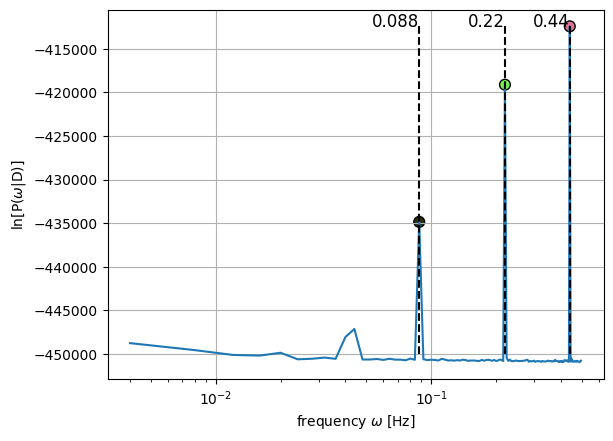

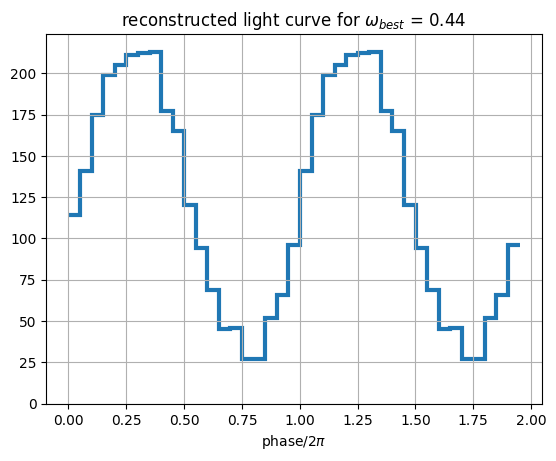

In [9]:
wbest = PlotData()

## Problem 2 (5P)

Write the Function **PlotLorenz.py** using *def*, that reads the data set *XYZ.csv* using *dask* and generates a 3D plot of the data. Note that the trajectory is partly transparent!

In [12]:
import dask.dataframe as dd

def PlotLorenz(file = 'XYZ.csv'):
    
    XYZ     = dd.read_csv(file)
    XYZ_arr = np.array(XYZ.values)
    
    
    #extracting coords
    X   = XYZ_arr[:,1]
    Y   = XYZ_arr[:,2]
    Z   = XYZ_arr[:,3]
        
    #####################plotting result#######################################
    ax = plt.figure().add_subplot(projection='3d')
    ax.plot(X, Y, Z, 'k', alpha = 0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('phase diagram')
    plt.show()

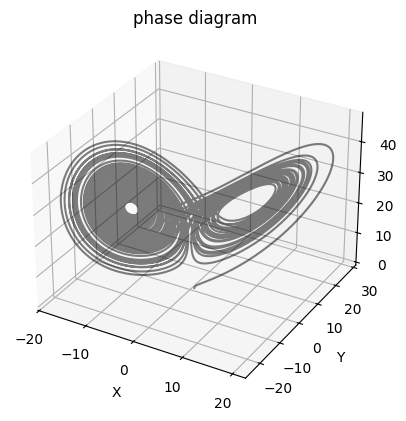

In [14]:
PlotLorenz()